<a href="https://colab.research.google.com/github/abusel9/Student_Alcohol_Consumption/blob/main/Student_Alcohol_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

We are utilizing the "Student Alcohol Consumption" dataset, which was acquired through a comprehensive survey conducted among students enrolled in math and Portuguese language courses at the secondary school level. This dataset contains a lot of interesting information pertaining to social dynamics, gender demographics, and study-related factors among students. Initially, our research aimed to assess the association between grades and alcohol consumption. However, upon analyzing the dataset, we discovered that the variables within it are predominantly continuous in nature, rendering them less suitable for our intended investigation. Consequently, we made the decision to redirect our research focus towards examining the impact of parents' education on grades, as it emerged as the most highly correlated factor based on the heatmap analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

student = pd.read_csv('student-mat.csv')

# Data

The math dataset comprises a total of 33 variables, with a sample size of 394. Fortunately, the dataset is already fairly clean and requires no extensive cleaning procedures, except for subsetting to include only the variables relevant to our analysis. Consequently, we will be working with a carefully selected subset of variables to conduct our research.

In [ ]:
# clean data
student = student.dropna()
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Graphs

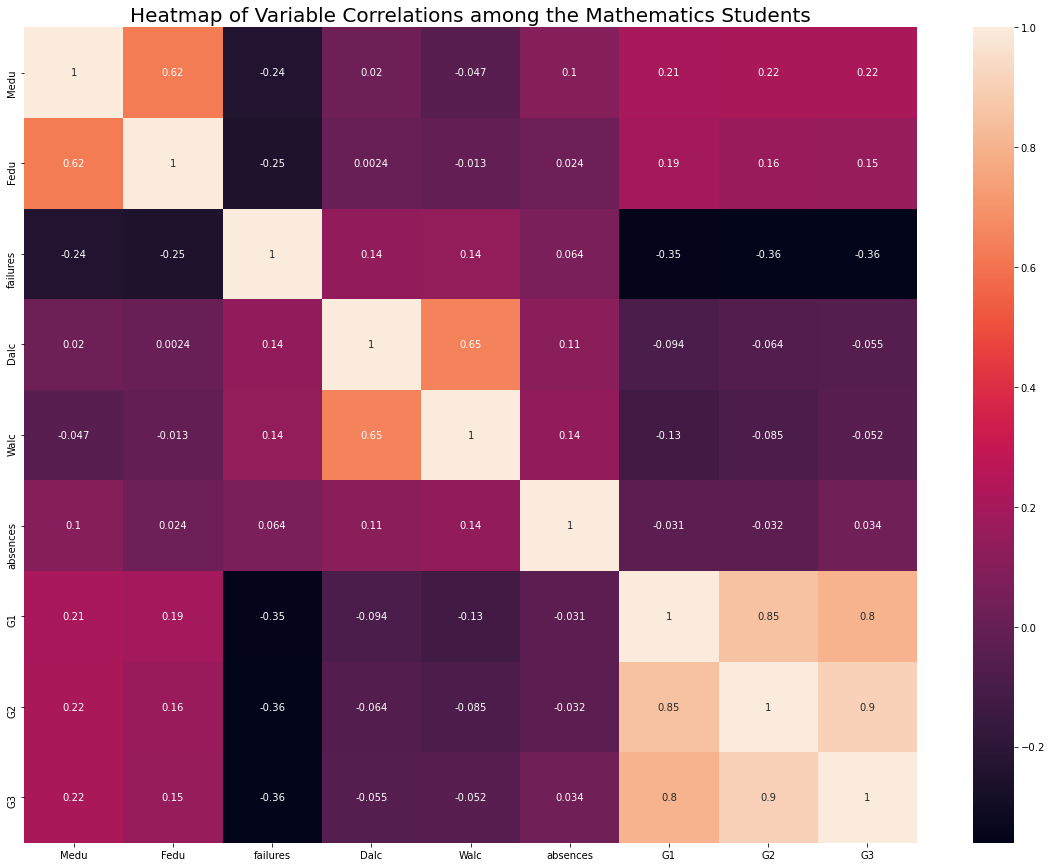

In [ ]:


shiggles = student[['Medu','Fedu','failures','Dalc','Walc','absences','G1','G2','G3']]

plt.figure(figsize=(20,15))
sns.heatmap(shiggles.corr(),annot=True)
plt.title('Heatmap of Variable Correlations among the Mathematics Students',fontsize=20)
plt.show()

Text(0, 0.5, 'First Period Grade')

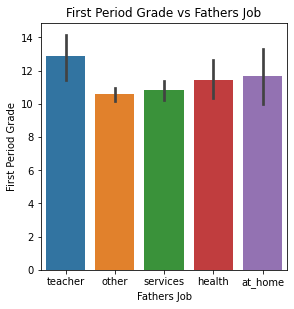

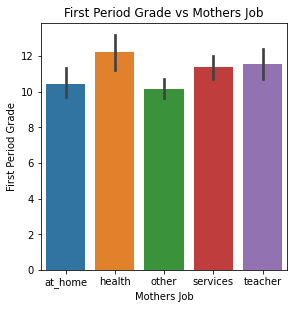

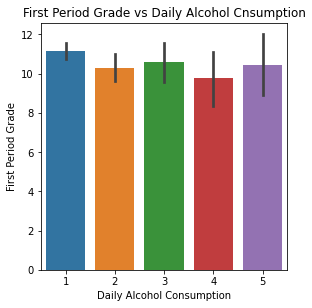

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='Fjob',y='G1',data = student)
plt.title('First Period Grade vs Fathers Job')
plt.xlabel('Fathers Job')
plt.ylabel('First Period Grade')

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='Mjob',y='G1',data = student)
plt.title('First Period Grade vs Mothers Job')
plt.xlabel('Mothers Job')
plt.ylabel('First Period Grade')

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='Dalc',y='G1',data = student)
plt.title('First Period Grade vs Daily Alcohol Cnsumption')
plt.xlabel('Daily Alcohol Consumption')
plt.ylabel('First Period Grade')

Text(0, 0.5, 'First Period Grades')

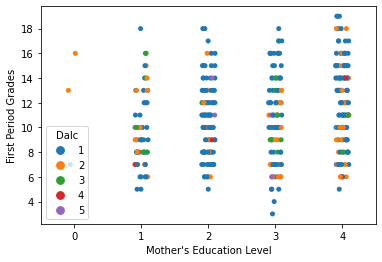

In [ ]:
#Mother's education and first period grades and how many drinks a student has a day

ax = sns.stripplot(x="Medu",
                   y="G1",
                   hue="Dalc",
                   data=student)

ax.set_xlabel("Mother's Education Level")
ax.set_ylabel("First Period Grades")

Text(0, 0.5, 'First Period Grades')

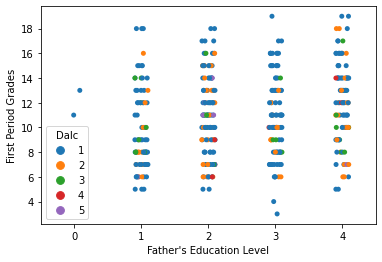

In [ ]:
#Father's education and first period grades and how many drinks a student has a day

ax = sns.stripplot(x="Fedu",
                   y="G1",
                   hue="Dalc",
                   data=student)

ax.set_xlabel("Father's Education Level")
ax.set_ylabel("First Period Grades")

# Analyses

### Linear Regression

In [ ]:
# set up
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_vals = np.array(student['Dalc']).reshape(len(student), 1)
y_vals = np.array(student['G1'])

# training data
xtrain, xtest, ytrain, ytest = train_test_split(x_vals,
                                                y_vals,
                                                train_size = 0.75,
                                                random_state = 1)

mod = LinearRegression()
# Fit the model
mod = mod.fit(X = x_vals, y = y_vals)

mod

# Fit the model
mod_tr = mod.fit(X = xtrain, y = ytrain)

print("Fitted Model Intercept: {}".format(mod_tr.intercept_))
print("Fitted Model Coefficients: {}".format(mod_tr.coef_))

# R^2 value
rsq_mod = mod.score(X = x_vals, y = y_vals) # R^2 value
print("R^2 value: {} ".format(rsq_mod))

# Fit the model on the training data
mod_tr = LinearRegression().fit(X = xtrain, y = ytrain)

# Generate model predictions for the test data
mod_preds_test = mod_tr.predict(X = xtest)

# Compare MSE for the model predictions on train and test data
mod_preds_train = mod_tr.predict(X = xtrain)

mse_train = mean_squared_error(y_true = ytrain, y_pred = mod_preds_train)
mse_train

mse_test = mean_squared_error(y_true = ytest, y_pred = mod_preds_test)
mse_test

print("Training MSE: {} \nTest MSE: {}".format(mse_train, mse_test))

Fitted Model Intercept: 11.448233587991687
Fitted Model Coefficients: [-0.31672821]
R^2 value: 0.008332295581936489 
Training MSE: 11.311371356854785 
Test MSE: 9.660453657293932


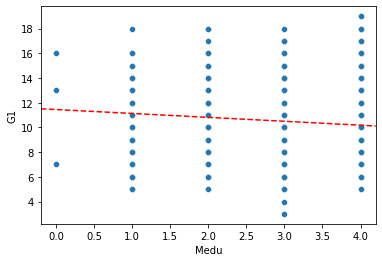

In [ ]:
# Linear Regression for first period grade and Mother's education

sns.scatterplot(data = student,
                x = "Medu",
                y = "G1"
               )

plt.axline(xy1 = (0, mod.intercept_), slope = mod.coef_[0], color = "r", linestyle = "--")

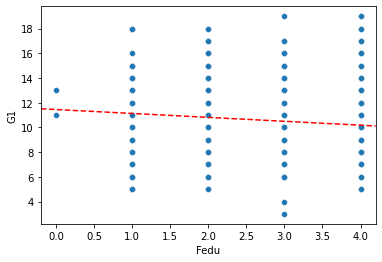

In [ ]:
# Linear Regression for first period grade and Father's education

sns.scatterplot(data = student,
                x = "Fedu",
                y = "G1"
               )

plt.axline(xy1 = (0, mod.intercept_), slope = mod.coef_[0], color = "r", linestyle = "--")

The correlation between first period grades and a parent's education is positive, but when taking into account daily drinking habits there is a negative correlation. The higher a parent's education, the less a math student drinks alcoholic beveages althoug this relationship isn't strong.

### K-nearest neighbors (k-NN)

Trying to predict if the relationship between a Father's education and grades are indicators to how much a student drinks

In [ ]:
# create training data based off of Father's education and grades bc that was the most interesting thing we have found

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
k = 3
knn = KNeighborsClassifier(n_neighbors = k)

x_vals = student.loc[:, ('Fedu', 'G1')]
y_vals = student.loc[:, 'Dalc']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals,
                                                test_size = 0.75, # we'll use a small test set here
                                                random_state = 0 # make this process reproducible
                                               )
xtrain = xtrain.reset_index(drop = True)
xtest = xtest.reset_index(drop = True)
ytrain = ytrain.reset_index(drop = True)
ytest = ytest.reset_index(drop = True)

knn.fit(X = xtrain, y = ytrain)

# Take a look at the train/test set
print(xtrain)

preds = knn.predict(X = xtest)
preds

knn_eval = pd.DataFrame({
    "Fedu": xtest['Fedu'],
    "G1": xtest['G1'],
    "Dalc": ytest,
    "knn prediction": preds
})

knn_eval

knn_eval['correct'] = knn_eval['Dalc'] == knn_eval['knn prediction']
knn_eval

    Fedu  G1
0      2  10
1      4  11
2      3  11
3      2  10
4      2  14
..   ...  ..
93     1  12
94     2   7
95     3  13
96     3  19
97     4  13

[98 rows x 2 columns]


,Fedu,G1,Dalc,knn prediction,correct
0,4,14,1,1,True
1,4,11,2,1,False
2,3,9,1,2,False
3,3,16,1,1,True
4,2,15,1,2,False
...,...,...,...,...,...
292,1,15,1,1,True
293,2,13,2,1,False
294,2,8,1,1,True
295,4,5,1,1,True


Let’s graph the predictions for easier analysis:

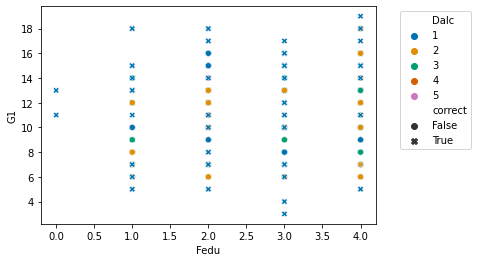

In [ ]:
sns.scatterplot(data = knn_eval,
                x = "Fedu",
                y = "G1",
                hue = "Dalc",
                style = "correct",
                palette='colorblind'
               )
plt.legend(loc = 'upper right',
           bbox_to_anchor = (1.3, 1))

#### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(knn_eval['Dalc'], knn_eval['knn prediction'])

0.6026936026936027

We used K-nearest neighbors to find whether k elements of the relationship between a math student's first period grade and their father's education level is a good indicator of how much that student drinks. After performing the analysis, the simple accuaracy score is 60%, which isn't the best considering that some values may be more frequent than others.

### Clustering with k-means

Let's determine how many clusters we should have.

<AxesSubplot:>

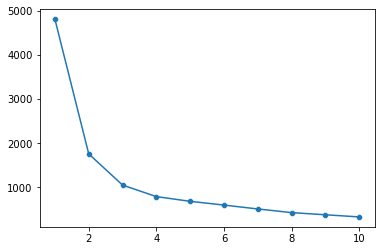

In [ ]:
from sklearn.cluster import KMeans

kmeans = np.arange(1, 11)
inertias = []

for x in kmeans:
    inertias.append(
        KMeans(n_clusters = x, random_state = 1).fit(X = x_vals).inertia_
    )


sns.scatterplot(x = kmeans, y = inertias)
sns.lineplot(x = kmeans, y = inertias)

Seems like 4 would be the max using the elbow method.

KMeans(n_clusters=4, random_state=1)
[[ 2.63636364 10.0661157 ]
 [ 2.75384615 16.13846154]
 [ 2.16216216  6.96396396]
 [ 2.63265306 12.94897959]]


<AxesSubplot:xlabel='Fedu', ylabel='G1'>

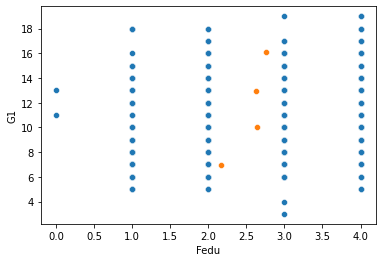

In [ ]:
# Get our features (now we don't have corresponding labels!)
x_vals = np.array(student[['Fedu', 'G1']]).reshape(len(student), 2)

# Initialize the model
kmeans = KMeans(n_clusters = 4, # default value is 8
                random_state = 1)

# Fit the model to our data
kmeans.fit(X = x_vals)

print(kmeans)

# The cluster centers estimated by our k-means clustering
print(kmeans.cluster_centers_)

x_center = []
y_center = []
for elem in kmeans.cluster_centers_:
    x_center.append(elem[0])
    y_center.append(elem[1])

sns.scatterplot(data = student,
                x = "Fedu",
                y = "G1")
sns.scatterplot(x = x_center, y = y_center)

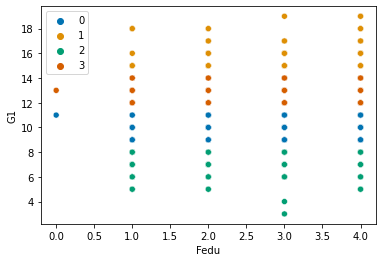

In [ ]:
# add labels
kmeans.labels_

sns.scatterplot(data = student,
                x = "Fedu",
                y = "G1",
                hue = kmeans.labels_,
               palette = 'colorblind')
plt.show()

How does this compare to how many alcoholic drinks students have?

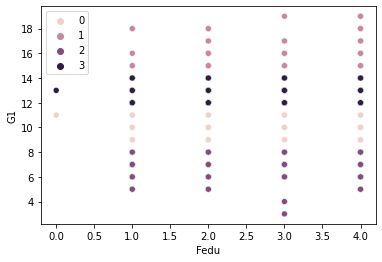

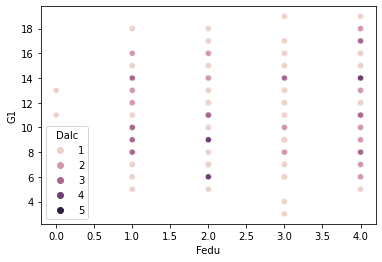

In [ ]:
sns.scatterplot(data = student,
                x = "Fedu",
                y = "G1",
                hue = kmeans.labels_)
plt.show()

sns.scatterplot(data = student,
                x = "Fedu",
                y = "G1",
                hue = "Dalc")
plt.show()

Using the relationship between a math student's first period grades and father's education level is not a good indicator of how many alcoholic drinks they have. Clustering by K-means labels show results that appear uniform on a graph, while clustering by how many alcoholic drinks a student has appears to have no apparent pattern. Clustering by 4 seemed to be like our best option after using the elbow method, but results are not consitent with the data we have.

### Principal Components Analysis (PCA)

In [ ]:
from sklearn.preprocessing import StandardScaler

student = student[['Medu','Fedu', 'G1', 'Dalc', 'Walc']]

student_scaled = StandardScaler().fit_transform(student)
student_scaled = pd.DataFrame(student_scaled, columns = student.columns)
student_scaled

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(student_scaled)

print("Number of Components: {}".format(pca.n_components_))
print("Variance Among Components: {}".format(pca.explained_variance_))
print("Proportion of the total variance that each component explaining: {}".format(pca.explained_variance_ratio_))

Number of Components: 5
Variance Among Components: [1.784966   1.62834046 0.87043273 0.39325403 0.33569714]
Proportion of the total variance that each component explaining: [0.35608942 0.32484362 0.17364582 0.07845169 0.06696945]


We can describe most of the variance in our data with just a couple dimensions. Like regression coefficients, these weights tell us about the pattern in our original variables that each principal component is capturing. We can see that the total variance that each component shows that we do not need to use many variables or go deep into dimensionality. We can save oursleves the effort of doing more for less.

# Conclusions

After performing numerous analyses (linear regressions, K-nearest neighbors, clustering with K-means, and PCA) it is found that daily alcohol intake by math students cannot be determined using their Father's education level and their grades for first period. While grades and a parent's education are positively correlated, as seen with the heat map, it appears that daily alcohol consumption has no apparent pattern within their relationship. Our linear regression showed that it was actually negatively correlated. Using K-nearest neighbors to find how many drinks a hypothetical student would have a day only gave us a 60% accuracy based on our data. Graphing our clusters made with K-means and comparing it with our unclustered data showed that there was no related pattern between how many drinks a math student has a day based on their grades and Father's education. A brief Principal Components Analysis gave us results showed that we did not need to go deep into multidimensional analysis for our results. Our results are better than our initial choice of analysis (finding how alcohol consumption affected grades) because there was not a correlation when performing regressions, when looking at our heat map, or even a pattern when looking at other methods of analysis. Despite this, I was expecting to find more interesting results after spending more time with the data. Limitations we faced was that this data was not continuous and would have made it difficult and redundant to have done more complex analyses with this dataset. Unfortunately outstanding results were not found, but it is a learning process.